In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [33]:
df = pd.read_csv('../data/combined_bbb_classification.csv')
df.head()

,name,smiles,BBB,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,sulphasalazine,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,0,12.34,12.34,0.02,-3.79,0.54,11.43,398.40,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,moxalactam,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,0,13.19,13.19,0.04,-2.14,0.13,22.00,520.48,...,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,clioquinol,Oc1c(I)cc(Cl)c2cccnc12,0,9.65,9.65,0.20,0.20,0.76,10.62,305.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,bbcpd11 (cimetidine analog) (y-g13),CCNC(=NCCSCc1ncccc1Br)NC#N,0,8.54,8.54,0.53,0.53,0.27,10.89,342.27,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,schembl614298,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,0,11.45,11.45,0.17,-1.80,0.35,45.30,461.47,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Data Preprocessing


In [34]:
# check for missing values
df.isna().sum()

name                 1109
smiles                  0
BBB                     0
MaxAbsEStateIndex      13
MaxEStateIndex         13
                     ... 
fr_thiazole            13
fr_thiocyan            13
fr_thiophene           13
fr_unbrch_alkane       13
fr_urea                13
Length: 220, dtype: int64

In [35]:
# checking 13 missing values in fr_urea column
df[df.fr_urea.isnull()]

,name,smiles,BBB,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
4933,mepenzolatebromide,C[N+]1(C)CCC[C@H](OC(=O)[C+](O)(c2ccccc2)c2ccc...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7627,tiotidine,C[N+]1(C)CCCC(OC(=O)[C+](O)(c2ccccc2)c2ccccc2)C1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7753,15,O=N([O-])C1=C(CN=C1NCCSCc2ncccc2)Cc3ccccc3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7755,22767,c1(nc(NC(N)=[NH2])sc1)CSCCNC(=[NH]C#N)NC,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8052,ICI17148,Cc1nc(sc1)\[NH]=C(\N)N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8230,5-6,s1cc(CSCCN\C(NC)=[NH]\C#N)nc1\[NH]=C(\N)N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8257,12,c1c(c(ncc1)CSCCN\C(=[NH]\C#N)NCC)Br,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8260,16,n1c(csc1\[NH]=C(\N)N)c1ccccc1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8261,17,n1c(csc1\[NH]=C(\N)N)c1cccc(c1)N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8262,18,n1c(csc1\[NH]=C(\N)N)c1cccc(c1)NC(C)=O,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# dropping these with missing values
df.dropna(subset=['fr_urea'], inplace=True)

In [37]:
# drop the name and smiles column as it is not needed for modeling
df.drop(columns=['name','smiles'], inplace=True)

# fill any remaining missing values with zero
df.fillna(0, inplace=True)

In [38]:
df.head()

,BBB,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,12.34,12.34,0.02,-3.79,0.54,11.43,398.40,384.29,398.07,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0,13.19,13.19,0.04,-2.14,0.13,22.00,520.48,500.32,520.10,...,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,0,9.65,9.65,0.20,0.20,0.76,10.62,305.50,300.46,304.91,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0,8.54,8.54,0.53,0.53,0.27,10.89,342.27,326.14,341.03,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,11.45,11.45,0.17,-1.80,0.35,45.30,461.47,434.25,461.17,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Standardizing data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('BBB', axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[1:])  # Exclude the target column 'BBB'
scaled_df['BBB'] = df['BBB'].values

In [40]:
scaled_df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,BBB
0,0.25,0.25,-0.57,-2.16,-0.22,-1.08,0.10,0.18,0.10,-0.02,...,5.17,-0.14,-0.09,-0.12,-0.18,0.00,-0.13,-0.14,-0.18,0
1,0.52,0.52,-0.50,-0.87,-2.04,-0.25,0.84,0.93,0.84,0.72,...,-0.16,-0.14,-0.09,8.45,-0.18,0.00,-0.13,-0.14,-0.18,0
2,-0.61,-0.61,0.04,0.95,0.75,-1.15,-0.46,-0.36,-0.46,-1.20,...,-0.16,-0.14,-0.09,-0.12,-0.18,0.00,-0.13,-0.14,-0.18,0
3,-0.97,-0.97,1.24,1.21,-1.42,-1.12,-0.23,-0.19,-0.24,-0.64,...,-0.16,-0.14,-0.09,-0.12,-0.18,0.00,-0.13,-0.14,-0.18,0
4,-0.04,-0.04,-0.07,-0.60,-1.09,1.59,0.48,0.50,0.48,0.54,...,-0.16,-0.14,-0.09,-0.12,-0.18,0.00,-0.13,-0.14,-0.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9619,-0.15,-0.15,-0.52,0.02,-0.55,-1.14,-0.63,-0.54,-0.64,-0.86,...,-0.16,-0.14,-0.09,-0.12,-0.18,0.00,-0.13,-0.14,-0.18,1
9620,-0.28,-0.28,0.09,-0.20,-1.10,0.20,0.10,0.13,0.10,0.07,...,-0.16,-0.14,-0.09,-0.12,-0.18,0.00,-0.13,-0.14,-0.18,1
9621,0.10,0.10,-0.32,0.41,0.43,-1.06,-0.35,-0.33,-0.35,-0.33,...,-0.16,-0.14,-0.09,-0.12,-0.18,0.00,-0.13,-0.14,5.15,1
9622,-0.89,-0.89,1.53,1.28,-0.01,-1.13,0.01,0.00,0.01,0.07,...,-0.16,-0.14,-0.09,-0.12,-0.18,0.00,-0.13,-0.14,-0.18,1


In [41]:
# check BBB class distribution
scaled_df['BBB'].value_counts()

BBB
1    6358
0    3266
Name: count, dtype: int64

In [42]:
# perform BBB class balancing using SMOTE

from imblearn.over_sampling import SMOTE
X = scaled_df.drop('BBB', axis=1)
y = scaled_df['BBB']
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['BBB'] = y_res.values
balanced_df['BBB'].value_counts()


BBB
0    6358
1    6358
Name: count, dtype: int64

# Build Model

In [43]:
from sklearn.model_selection import train_test_split

# splitting data into train and test data
# scaled_train_df, scaled_test_df = train_test_split(scaled_df, test_size=0.2, random_state=42)
balanced_train_df, balanced_test_df = train_test_split(balanced_df, test_size=0.2, random_state=42)



### Using Lazy Predict to help identify potential high performant models

In [44]:
from lazypredict.Supervised import LazyClassifier

def run_lazy_classifier(data):
    # Splitting data into features and target variable
    X = data.drop(columns='BBB')
    y = data['BBB']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)

    print(models)

In [81]:
# run lazy classifier on balanced data
run_lazy_classifier(balanced_train_df)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 3558, number of negative: 3562
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31181
[LightGBM] [Info] Number of data points in the train set: 7120, number of used features: 202
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499719 -> initscore=-0.001124
[LightGBM] [Info] Start training from score -0.001124
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.93               0.93     0.93      0.93   
ExtraTreesClassifier               0.93               0.93     0.93      0.93   
RandomForestClassifier             0.93               0.93     0.93      0.93   
BaggingClassifier                  0.92               0.92     0.92      0.92   
DecisionTreeClassifie

### QSAR Models

In [ ]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, matthews_corrcoef, average_precision_score
import joblib

results = []
conf_matrices = []
saved_models = {}

In [ ]:

# Define the models
def build_models(data):
    X = data.drop(columns='BBB')
    y = data['BBB']

    models = [
        ('KNN', KNeighborsClassifier(n_neighbors=3)),
        ('SVM', SVC(probability=True)),
        ('RF', RandomForestClassifier(max_depth=8, n_estimators=100)),
        ('LR', LogisticRegression(max_iter=1000)),
    ]


    # using stratified kfold
    from sklearn.model_selection import StratifiedKFold
    fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


    # Perform cross-validation on each model
    for name, model in models:
        # Get cross-validated predictions
        print('Performing cross validation on ',name)
        y_pred = cross_val_predict(model, X, y, cv=fold)
        
        # Get probability predictions
        y_proba = cross_val_predict(model, X, y, cv=fold, method='predict_proba')
        
        # Compute the confusion matrix
        cm = confusion_matrix(y, y_pred)
        
        # Extract confusion matrix values
        TN, FP, FN, TP = cm.ravel()
        
        # Calculate metrics
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        
        # Save results
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'Specificity': specificity,
            'F1 Score': f1,
            'roc_auc': roc_auc_score(y, y_proba[:, 1]) if y_proba is not None else None,
            'pr_auc': average_precision_score(y, y_proba[:, 1]) if y_proba is not None else None,
            'mcc': matthews_corrcoef(y, y_pred)
        })
        
        # Store confusion matrix
        conf_matrices.append(cm)
        
        # Fitting models
        print('Fitting ', name)
        model.fit(X, y)
        
        # Save models for future prediction
        saved_models[name] = model
        print(f'... Successfully saved {name} model.')
            

In [ ]:
# build models on balanced data
build_models(balanced_train_df)

Performing cross validation on  KNN
Fitting  KNN
... Successfully saved KNN model.
Performing cross validation on  SVM
Fitting  SVM
... Successfully saved SVM model.
Performing cross validation on  RF
Fitting  RF
... Successfully saved RF model.
Performing cross validation on  LR
Fitting  LR
... Successfully saved LR model.


In [ ]:
# train xgboost model since its not compatible with sklearn's cross_val_predict
def train_xgboost(data):
	X = data.drop(columns='BBB')
	y = data['BBB']
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
	
	model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)
	y_proba = model.predict_proba(X_test)

	# Calculate additional metrics for XGBoost
	from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
	accuracy_xgb = accuracy_score(y_test, y_pred)
	precision_xgb = precision_score(y_test, y_pred)
	recall_xgb = recall_score(y_test, y_pred)
	f1_xgb = f1_score(y_test, y_pred)
	roc_auc_xgb = roc_auc_score(y_test, y_proba[:, 1])
	pr_auc_xgb = average_precision_score(y_test, y_proba[:, 1])
	mcc_xgb = matthews_corrcoef(y_test, y_pred)

	# Calculate specificity
	cm_xgb = confusion_matrix(y_test, y_pred)
	TN, FP, FN, TP = cm_xgb.ravel()
	specificity_xgb = TN / (TN + FP) if (TN + FP) != 0 else 0

	results.append({
		'Model': 'XGB',
		'Accuracy': accuracy_xgb,
		'Precision': precision_xgb,
		'Recall': recall_xgb,
		'Specificity': specificity_xgb,
		'F1 Score': f1_xgb,
		'roc_auc': roc_auc_xgb,
		'pr_auc': pr_auc_xgb,
		'mcc': mcc_xgb
	})

	# Save the XGBoost model
	saved_models['XGB'] = model
	print('... Successfully saved XGB model.')


In [ ]:
#train xgboost on balanced data
train_xgboost(balanced_train_df)

... Successfully saved XGB model.


In [ ]:
# Create a results DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,roc_auc,pr_auc,mcc
0,KNN,0.92,0.93,0.90,0.93,0.92,0.96,0.95,0.83
1,SVM,0.89,0.89,0.89,0.89,0.89,0.95,0.96,0.79
2,RF,0.89,0.87,0.93,0.86,0.90,0.96,0.96,0.79
3,LR,0.84,0.83,0.87,0.82,0.85,0.92,0.92,0.69
4,XGB,0.93,0.94,0.93,0.94,0.93,0.98,0.98,0.87


In [ ]:
# Save each model
# for name, model in saved_models.items():
#     joblib.dump(model, f'../models/{name}_model.pkl')

### Deep Learning Models

In [ ]:
# Build a Multilayer Perceptron (MLP) for classification

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Use your balanced and scaled data
X = balanced_train_df.drop('BBB', axis=1).values
y = balanced_train_df['BBB'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP model with Dropout and L2 Regularization
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the callback
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate on test set (will use the best weights because of restore_best_weights=True)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7102 - loss: 0.6903 - val_accuracy: 0.8329 - val_loss: 0.4894
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8287 - loss: 0.5074 - val_accuracy: 0.8532 - val_loss: 0.4417
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8409 - loss: 0.4677 - val_accuracy: 0.8649 - val_loss: 0.4199
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8532 - loss: 0.4369 - val_accuracy: 0.8643 - val_loss: 0.4063
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8642 - loss: 0.4097 - val_accuracy: 0.8765 - val_loss: 0.3934
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8749 - loss: 0.3854 - val_accuracy: 0.8808 - val_loss: 0.3768
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8730 - loss: 0.3665 - val_accuracy: 0.8845 - val_loss: 0.3615
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8752 - loss: 0.3696 - val_accu

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions for the test set
y_proba_mlp = model.predict(X_test)
y_pred_mlp = (y_proba_mlp > 0.5).astype("int32")

# Calculate additional metrics
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_proba_mlp)
pr_auc_mlp = average_precision_score(y_test, y_proba_mlp)
mcc_mlp = matthews_corrcoef(y_test, y_pred_mlp)

# Calculate specificity from confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
TN, FP, FN, TP = cm_mlp.ravel()
specificity_mlp = TN / (TN + FP) if (TN + FP) != 0 else 0

# Append results to the list
results.append({
    'Model': 'MLP',
    'Accuracy': test_acc,
    'Precision': precision_mlp,
    'Recall': recall_mlp,
    'Specificity': specificity_mlp,
    'F1 Score': f1_mlp,
    'roc_auc': roc_auc_mlp,
    'pr_auc': pr_auc_mlp,
    'mcc': mcc_mlp
})

# Save the MLP model
# model.save('../models/MLP_model.h5')
# print('... Successfully saved MLP model.')

# Re-create and display the results DataFrame
results_df = pd.DataFrame(results)
results_df

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Model,Accuracy,Precision,Recall,Specificity,F1 Score,roc_auc,pr_auc,mcc
0,KNN,0.92,0.93,0.90,0.93,0.92,0.96,0.95,0.83
1,SVM,0.89,0.89,0.89,0.89,0.89,0.95,0.96,0.79
2,RF,0.89,0.87,0.93,0.86,0.90,0.96,0.96,0.79
3,LR,0.84,0.83,0.87,0.82,0.85,0.92,0.92,0.69
4,XGB,0.93,0.94,0.93,0.94,0.93,0.98,0.98,0.87
5,MLP,0.91,0.93,0.88,0.94,0.90,0.96,0.96,0.82


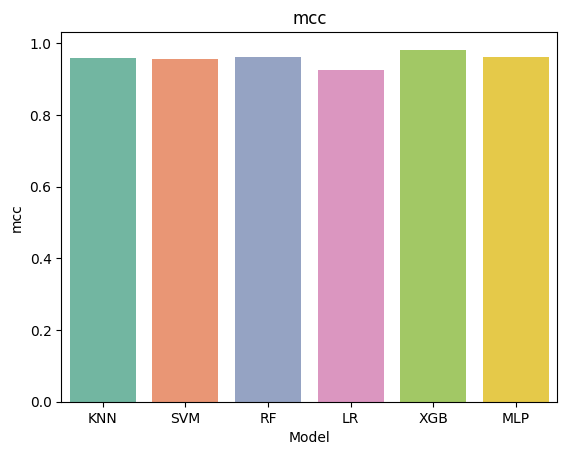

In [51]:
# plot individual metrics and save
metrics = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'roc_auc', 'pr_auc', 'mcc']
for metric in metrics:
    sns.barplot(x='Model', y=metric, data=results_df, palette= 'Set2')
    plt.title(metric)
    plt.ylabel(metric)
    plt.xlabel('Model')
    # save plot
    plt.savefig(f'../figures/model_plots/{metric}_comparison.png')

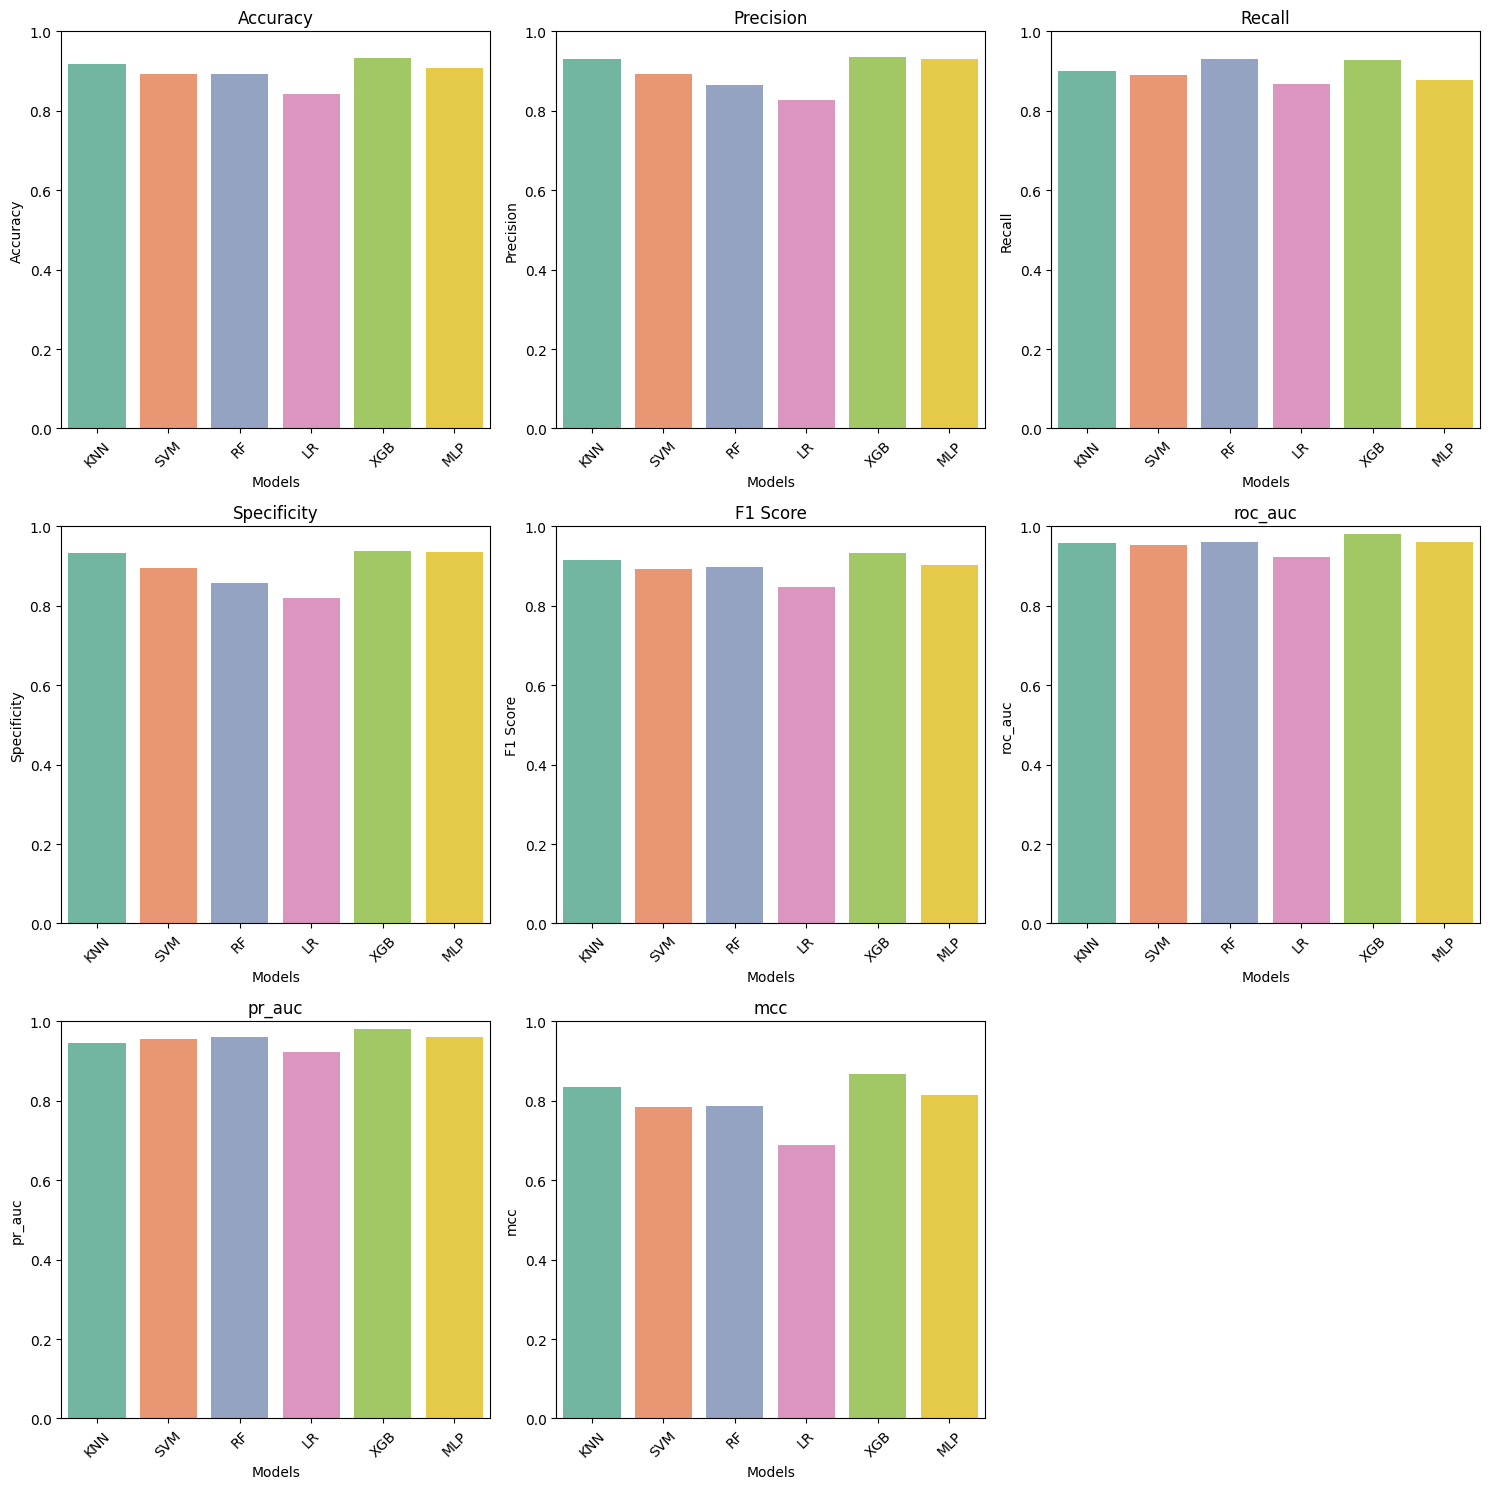

In [ ]:
# plot all metrics in a single figure
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results_df, palette='Set2', ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(metric)
    axs[i//3, i%3].set_ylim(0, 1) 
    axs[i//3, i%3].set_ylabel(metric)
    axs[i//3, i%3].set_xlabel('Models')
    axs[i//3, i%3].tick_params(axis='x', rotation=45)
   
# Remove the empty subplot
fig.delaxes(axs[2, 2])

#save each plot
plt.savefig("../figures/model_plots/model_comparism.png")
plt.tight_layout()
plt.show()

### Evaluating Saved models on test data

In [62]:
# evaluate saved models on test data
model_names = ['KNN', 'SVM', 'RF', 'LR', 'XGB']
loaded_models = {name: joblib.load(f'../output/models/{name}_model.pkl') for name in model_names }
MLP_model = tf.keras.models.load_model('../output/models/MLP_model.h5')

# Prepare test data
X_test = balanced_test_df.drop('BBB', axis=1).values
y_test = balanced_test_df['BBB'].values

eval_results = []
predictions = pd.DataFrame()

# Evaluate traditional ML models
from sklearn.metrics import accuracy_score
for name, model in loaded_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    eval_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Specificity': specificity,
        'F1 Score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba[:, 1]),
        'pr_auc': average_precision_score(y_test, y_proba[:, 1]),
        'mcc': matthews_corrcoef(y_test, y_pred)
    })
    
    predictions[name] = y_pred
    predictions[f'{name}_proba'] = y_proba[:, 1]

# Evaluate MLP model
y_proba_mlp = MLP_model.predict(X_test)
y_pred_mlp = (y_proba_mlp > 0.5).astype("int32")

# Calculate metrics for MLP
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
TN, FP, FN, TP = cm_mlp.ravel()
specificity_mlp = TN / (TN + FP) if (TN + FP) != 0 else 0

eval_results.append({
    'Model': 'MLP',
    'Accuracy': accuracy_score(y_test, y_pred_mlp),
    'Precision': precision_score(y_test, y_pred_mlp),
    'Recall': recall_score(y_test, y_pred_mlp),
    'Specificity': specificity_mlp,
    'F1 Score': f1_score(y_test, y_pred_mlp),
    'roc_auc': roc_auc_score(y_test, y_proba_mlp),
    'pr_auc': average_precision_score(y_test, y_proba_mlp),
    'mcc': matthews_corrcoef(y_test, y_pred_mlp)
})

predictions['MLP'] = y_pred_mlp.flatten()
predictions['MLP_proba'] = y_proba_mlp.flatten()


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [63]:
eval_df = pd.DataFrame(eval_results)
eval_df

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,roc_auc,pr_auc,mcc
0,KNN,0.92,0.94,0.89,0.94,0.91,0.95,0.94,0.83
1,SVM,0.90,0.90,0.89,0.90,0.90,0.95,0.96,0.79
2,RF,0.89,0.86,0.93,0.85,0.89,0.95,0.95,0.78
3,LR,0.84,0.83,0.86,0.82,0.84,0.92,0.92,0.68
4,XGB,0.91,0.91,0.92,0.91,0.91,0.97,0.97,0.83
5,MLP,0.90,0.93,0.86,0.93,0.89,0.96,0.96,0.79


In [64]:
predictions['BBB'] = y_test
predictions

,KNN,KNN_proba,SVM,SVM_proba,RF,RF_proba,LR,LR_proba,XGB,XGB_proba,MLP,MLP_proba,BBB
0,1,1.00,1,0.97,1,0.88,1,0.93,1,1.00,1,0.99,1
1,1,1.00,1,0.97,1,0.89,1,0.88,1,1.00,1,0.99,1
2,1,1.00,1,0.99,1,0.89,1,0.89,1,1.00,1,1.00,1
3,0,0.33,0,0.05,0,0.13,0,0.09,0,0.03,0,0.09,0
4,0,0.00,0,0.05,0,0.03,0,0.03,0,0.00,0,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,0,0.00,1,0.68,1,0.52,0,0.49,0,0.44,0,0.33,0
2540,1,1.00,1,0.96,1,0.93,1,0.80,1,1.00,1,0.99,1
2541,1,1.00,1,0.99,1,0.93,1,0.93,1,1.00,1,1.00,1
2542,0,0.33,0,0.40,1,0.74,0,0.30,1,0.91,0,0.46,0


In [71]:
# count how many BBB positive cases are correctly predicted by each model
cnt_BBB = 0
cnt = {}
models = ['KNN', 'SVM', 'RF', 'LR', 'XGB', 'MLP']
for i in range(len(predictions['BBB'])):
    if predictions['BBB'][i] == 1:
        cnt_BBB +=1 
        for model in models:
            if predictions[model][i] == 1:
                if model not in cnt:
                    cnt[model] = 1
                else:
                    cnt[model] += 1
print(f'Total BBB positive cases in test set: {cnt_BBB}')
print(cnt)

Total BBB positive cases in test set: 1274
{'KNN': 1137, 'SVM': 1139, 'RF': 1183, 'LR': 1098, 'XGB': 1172, 'MLP': 1094}


In [72]:
# count how many BBB negative cases are correctly predicted by each model
cnt_BBB = 0
cnt = {}
models = ['KNN', 'SVM', 'RF', 'LR', 'XGB', 'MLP']
for i in range(len(predictions['BBB'])):
    if predictions['BBB'][i] == 0:
        cnt_BBB +=1 
        for model in models:
            if predictions[model][i] == 0:
                if model not in cnt:
                    cnt[model] = 1
                else:
                    cnt[model] += 1
print(f'Total BBB negative cases in test set: {cnt_BBB}')
print(cnt)

Total BBB negative cases in test set: 1270
{'KNN': 1194, 'SVM': 1141, 'RF': 1076, 'LR': 1041, 'XGB': 1152, 'MLP': 1184}
